___
## Diplomatura en Probabilidad y Estadística / ITBA
[Campus](https://campus.itba.edu.ar/webapps/login/) / [edX](https://deep.ik.itba.edu.ar/courses/course-v1:itba+labpep+2020-ALUAR-Q2/course)
 
_Pablo Navarro_ [@](mailto:pablo.r.navarro@outlook.com)

### Problema de Monty Hall
 

Teoría del Problema en [Youtube](<https://www.youtube.com/watch?v=4Lb-6rxZxx0>)

___

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**`samples`**: Número de Corridas

**`mh`**: DataFrame que contiene la información de cada una de las `samples` Corridas

**`'Car Is At Door'`**: Ubicación del Auto en cada una de las Corridas (0, 1, 2).

**`'First Choice'`**: Puerta seleccionada por el Invitado en cada una de las Corridas (0, 1, 2).

**`'Chose to Change'`**: Decisión Aleatoria del Invitado de Cambiar o No Cambiar de Puerta en cada Corrida (0=No Cambiar, 1=Cambiar).

**`'Change'`**: Estrategia de Cambiar - El Invitado gana cuando su primera elección fue una Puerta con una Cabra, el Presentador descarta la que tenía la otra Cabra, y por lo tanto el Invitado elige la Puerta donde está el Auto.

**`'No Change'`**: Estrategia No Cambiar - El Invitado gana si elige la Puerta donde está el Auto.

**`'Random'`**: Estrategia de decidir cambiar o no cambiar de forma Aleatoria - El Invitado gana de acuerdo a si elige inicialmente una Puerta con una Cabra y luego elige Cambiar, o si elige inicialmente la Puerta que tiene el Auto y luego elige No Cambiar.

In [2]:
samples = 100_000

mh = pd.DataFrame( {'Car is at Door': np.random.choice(3, samples), 
                    'First Choice': np.random.choice(3, samples), 
                    'Chose to Change': np.random.choice(2, samples)})

mh['Change'] = (mh['Car is at Door'] != mh['First Choice'])

mh['No Change'] = (mh['Car is at Door'] == mh['First Choice'])

mh['Random'] = (mh['No Change'] & ~ mh['Chose to Change']) | (mh['Change'] & mh['Chose to Change'])

mh.head(10)

,Car is at Door,First Choice,Chose to Change,Change,No Change,Random
0,0,1,1,True,False,True
1,2,2,1,False,True,False
2,1,0,1,True,False,True
3,0,1,0,True,False,False
4,2,2,0,False,True,True
5,2,0,1,True,False,True
6,1,0,1,True,False,True
7,1,0,0,True,False,False
8,1,1,0,False,True,True
9,2,0,0,True,False,False


In [3]:
results = pd.DataFrame({'Strategy': ['Change', 'No Change', 'Random'],
                        'Model': [mh['Change'].mean(), mh['No Change'].mean(), mh['Random'].mean()],
                        'Theory': [2./3., 1./3., 1./2.] })

results['Error'] = (results['Model'] - results['Theory'])*100 / results['Theory']

results

,Strategy,Model,Theory,Error
0,Change,0.66725,0.666667,0.0875
1,No Change,0.33275,0.333333,-0.1750
2,Random,0.49810,0.500000,-0.3800


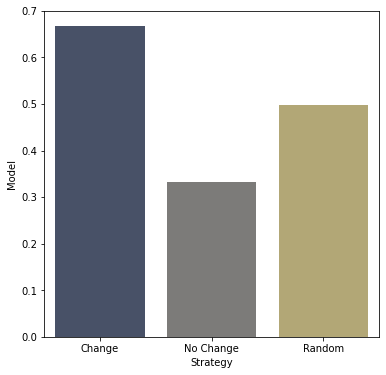

In [4]:
plt.figure(figsize=(6,6))
sns.barplot(x='Strategy', y='Model', data=results, palette='cividis')
plt.show()

La probabilidad de obtener el auto cambiando de puerta coincide con el $\frac{2}{3}$ que indica la teoría, mientras que la probabilidad de obtenerlo sin cambiar se mantiene en $\frac{1}{3}$ tal como era originalmente al momento de realizar la primera elección.

La probabilidad de obtener el auto al hacer una elección aleatoria coincide con el promedio de ambas probabilidades $(0.5 \frac{1}{3} + 0.5 \frac{2}{3})= \frac{1}{2}$.

Para evitar aumentar innecesariamente el número de `samples`, a continuación se calcula y grafica qué tan rápido se estabilizan los resultados para cada Estrategia.

In [5]:
cum = np.arange(1, samples + 1)
mh['Cum Change'] = mh['Change'].cumsum() / cum
mh['Cum No Change'] = mh['No Change'].cumsum() / cum
mh['Cum Random'] = mh['Random'].cumsum() / cum

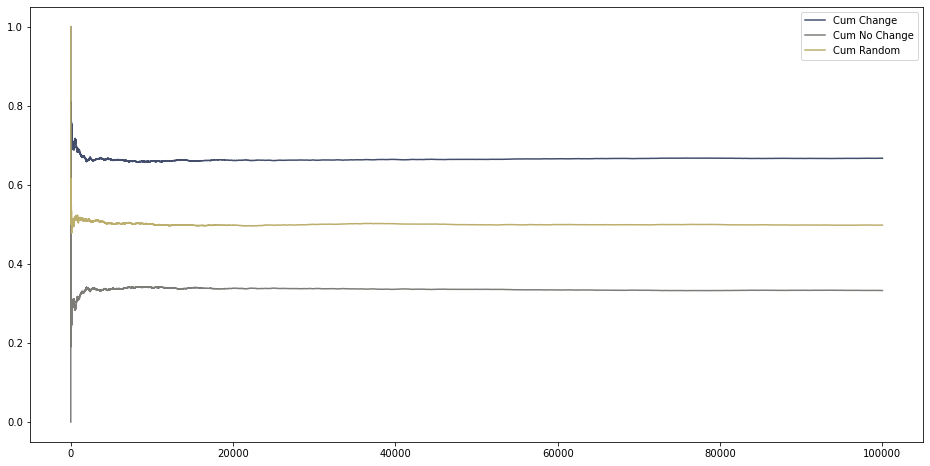

In [6]:
data= pd.DataFrame(mh, columns=['Cum Change', 'Cum No Change', 'Cum Random'])
plt.figure(figsize=(16,8))
sns.lineplot(data=data, palette='cividis', dashes=False)
plt.show()

In [7]:
mh

,Car is at Door,First Choice,Chose to Change,Change,No Change,Random,Cum Change,Cum No Change,Cum Random
0,0,1,1,True,False,True,1.000000,0.000000,1.000000
1,2,2,1,False,True,False,0.500000,0.500000,0.500000
2,1,0,1,True,False,True,0.666667,0.333333,0.666667
3,0,1,0,True,False,False,0.750000,0.250000,0.500000
4,2,2,0,False,True,True,0.600000,0.400000,0.600000
...,...,...,...,...,...,...,...,...,...
99995,1,0,1,True,False,True,0.667237,0.332763,0.498110
99996,0,1,1,True,False,True,0.667240,0.332760,0.498115
99997,0,1,0,True,False,False,0.667243,0.332757,0.498110
99998,2,1,0,True,False,False,0.667247,0.332753,0.498105
